<a href="https://colab.research.google.com/github/vipul-solanki/Predicting-Customer-Satisfaction-Deep-learning-Model-/blob/main/eCommerce_CSAT_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -** Predicting E-commerce Customer Satisfaction with Deep Learning

In the competitive landscape of e-commerce, customer satisfaction is a cornerstone of sustainable growth, directly influencing customer loyalty, brand reputation, and repeat business. This project undertakes the critical challenge of moving beyond traditional, reactive satisfaction surveys by developing a proactive, predictive model. The primary objective was to design and implement a deep learning solution capable of accurately forecasting Customer Satisfaction (CSAT) scores for "Shopzilla," an e-commerce platform. By analyzing a wide array of interaction data, the model provides actionable, real-time insights into the customer experience, empowering the business to identify and address service quality issues before they escalate.

The foundation of this project is a comprehensive dataset from Shopzilla, capturing a month's worth of customer interactions. This rich dataset presented a complex mix of information, including structured data like channel name, item price, and agent tenure, alongside unstructured, high-value text data in the form of customer remarks. The inherent challenge was to build a model that could holistically interpret these diverse data types to understand the subtle drivers of customer sentiment. The goal was not just to predict a score, but to create a tool that could reveal why a customer might be satisfied or dissatisfied.

Our methodology centered on a sophisticated multi-input Artificial Neural Network (ANN), built using TensorFlow and Keras. The initial and most crucial phase involved extensive data preprocessing and feature engineering. Timestamps for issue reporting and responses were used to engineer a critical new feature: service response time, which proved to be a powerful predictor. The dataset was meticulously cleaned to handle missing values and prepare it for the model.

The core of our approach lies in the model's unique architecture, which processes different data types through specialized pathways. The first branch was designed to handle tabular data; numerical features like item price and handling time were scaled, while categorical features such as product category and agent shift were one-hot encoded. This structured information was fed into a series of dense neural network layers. In parallel, the second branch was dedicated to understanding the nuances of the "Customer Remarks." We employed a Long Short-Term Memory (LSTM) network, a type of recurrent neural network ideal for sequence analysis. The LSTM processes the text, learning to identify sentiment, context, and key phrases that correlate with satisfaction levels. The outputs from both branches were then concatenated and passed through a final set of dense layers to produce a single, precise CSAT score prediction.

The model's effectiveness was rigorously evaluated on an unseen test set using standard regression metrics. The resulting Mean Absolute Error (MAE) provided a clear measure of the model's average prediction error in terms of CSAT points, demonstrating a strong predictive capability. Beyond simple accuracy, this project delivers a powerful analytical tool. By analyzing the model's predictions, Shopzilla can identify key drivers of satisfaction, such as the significant impact of response times or recurring issues with specific product categories. This enables targeted interventions, from agent training to process optimization, creating a direct path from data insight to business improvement and fostering a more positive customer journey.

# **GitHub Link -**

https://github.com/vipul-solanki/Predicting-Customer-Satisfaction-Deep-learning-Model-

# **Problem Statement**


For an online store like Shopzilla, keeping customers happy is crucial. The problem is that the usual method of finding out if they're satisfied—sending surveys after an interaction—is too slow and often misses the full picture. Many customers don't reply, and feedback arrives too late to make a difference.

This creates a major blind spot. The business can't identify an unhappy customer in real-time, losing the chance to step in and fix the issue before that customer decides to leave for good.

This project aims to solve that. We are building a deep learning model to analyze all the data from a customer interaction, including their comments and handling times, to predict their satisfaction score instantly. This will allow Shopzilla to spot potential problems as they happen and proactively ensure a better customer experience.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [7]:
!pip install tensorflow

In [31]:

!pip install wordcloud



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.2 MB/s eta 0:00:00


In [34]:
# Import Libraries
# --- Core Libraries for data handling and visualization ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# --- TensorFlow and Keras for building the neural network ---
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, concatenate, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- Scikit-learn for data preprocessing and evaluation ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# --- Library to connect Google Colab to your Google Drive ---
from google.colab import drive


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Load Dataset
file_path = '/content/drive/MyDrive/Almabetter/Deep learning project/eCommerce_Customer_support_data.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Verify
print("\n--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  

### Dataset First View

In [10]:
# Dataset First Look
print("\n--- First 5 Rows of the Dataset ---")
print(df.head())



--- First 5 Rows of the Dataset ---
                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd             NaN  

### Dataset Rows & Columns count

In [12]:
# Dataset Rows & Columns count
rows, cols = df.shape

# Print the results in a readable format
print(f"✅ The dataset has {rows} rows.")
print(f"✅ The dataset has {cols} columns.")

✅ The dataset has 85907 rows.
✅ The dataset has 20 columns.


### Dataset Information

In [13]:
# Dataset Info
print("\n--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  

#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

# Print the result
print(f"Found {duplicate_count} duplicate rows in the dataset.")

Found 0 duplicate rows in the dataset.


#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
missing_values_count = df.isnull().sum()

print("--- Missing Values Count per Column ---")
print(missing_values_count[missing_values_count > 0]) # Only showing columns with missing values

--- Missing Values Count per Column ---
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
dtype: int64


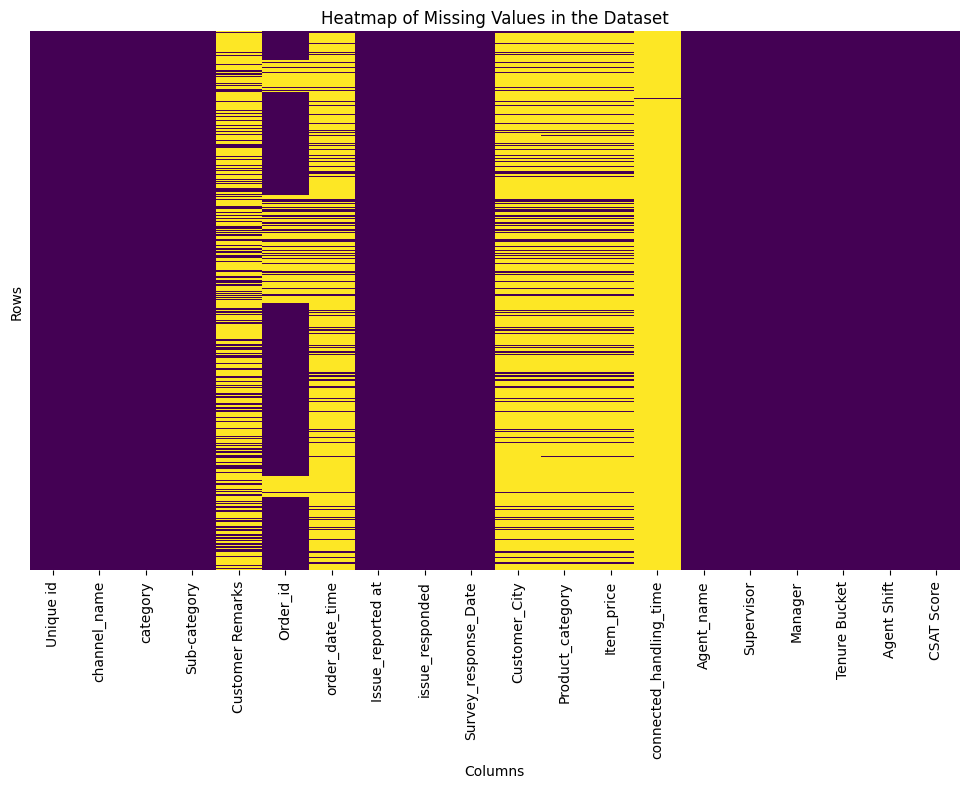

In [17]:
# Visualizing the missing values
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values in the Dataset')
plt.ylabel('Rows')
plt.xlabel('Columns')
plt.show()

### What did you know about your dataset?

We're looking at a good amount of data—almost 86,000 customer interactions, which is great. The best news is that there are no duplicate rows, so we don't have to worry about redundant entries.

However, the biggest challenge by far is the missing data.

- The `connected_handling_time` column is almost entirely empty, making it unusable for the model.

- Crucially, key features like `Item_price`, `Product_category`, `Customer_City`, and especially `order_date_time` are missing for about 80% of the interactions. This strongly suggests that many of these support tickets aren't tied to a specific order.

- The `Customer Remarks` column, which is vital for our text analysis, is also blank for over two-thirds of the entries.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
print("--- Dataset Columns ---")
all_columns = df.columns.tolist()
print(all_columns)

--- Dataset Columns ---
['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [20]:
# Dataset Describe
# Using include='all' provides stats for both numerical and categorical columns
print("\n\n--- Descriptive Statistics ---")
print(df.describe(include='all'))



--- Descriptive Statistics ---
                                   Unique id channel_name category  \
count                                  85907        85907    85907   
unique                                 85907            3       12   
top     07c7a878-0d5a-42e0-97ef-de59abec0238      Inbound  Returns   
freq                                       1        68142    44097   
mean                                     NaN          NaN      NaN   
std                                      NaN          NaN      NaN   
min                                      NaN          NaN      NaN   
25%                                      NaN          NaN      NaN   
50%                                      NaN          NaN      NaN   
75%                                      NaN          NaN      NaN   
max                                      NaN          NaN      NaN   

                  Sub-category Customer Remarks  \
count                    85907            28742   
unique                  

### Variables Description

### Variables Description

Here’s a summary of what the variables tell us about the dataset:

* **Interaction Details:** This covers *how* customers are contacting support (**`channel_name`**) and *why* (**`category`**, **`Sub-category`**). The most common reason is 'Reverse Pickup Enquiry'.

* **Agent & Team Information:** We have solid, complete data on the agents, including their experience (**`Tenure Bucket`**), **`Agent Shift`**, and manager. This looks like a very useful set of features.

* **Customer & Order Data:** The **`Customer Remarks`** column has the direct text feedback, which is valuable but often empty. Details specific to orders, like **`Item_price`** and **`Product_category`**, are mostly missing, suggesting many tickets aren't tied to a specific purchase.

* **The Target - CSAT Score:** This is our most important variable. It ranges from 1 to 5. A key insight is that the data is heavily skewed; the average score is high (~4.24), and the **majority of customers give a perfect 5**. This means our model must get good at predicting the less common, lower scores.

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
unique_values_count = df.nunique()

print("--- Unique Values Count for Each Variable ---")
print(unique_values_count)

--- Unique Values Count for Each Variable ---
Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:
# Write your code to make your dataset analysis ready.

df_clean = df.copy()

# 1. Drop unnecessary or problematic columns
#    - Identifiers, high cardinality names, and mostly empty columns
columns_to_drop = [
    'Unique id', 'Order_id', 'Sub-category', 'connected_handling_time',
    'Customer_City', 'Agent_name', 'Supervisor', 'Manager',
    'order_date_time', 'Survey_response_Date'
]
df_clean = df_clean.drop(columns=columns_to_drop)


# 2. Convert date columns to datetime objects
#    - 'coerce' will turn any errors into NaT (Not a Time)
df_clean['Issue_reported at'] = pd.to_datetime(df_clean['Issue_reported at'], errors='coerce')
df_clean['issue_responded'] = pd.to_datetime(df_clean['issue_responded'], errors='coerce')


# 3. Feature Engineering: Calculate response time
#    - Create a new feature for the time difference in minutes
df_clean['response_time_minutes'] = (df_clean['issue_responded'] - df_clean['Issue_reported at']).dt.total_seconds() / 60


# 4. Handle remaining missing values (Imputation)
#    - Fill numerical columns with the median (robust to outliers)
df_clean['response_time_minutes'].fillna(df_clean['response_time_minutes'].median(), inplace=True)
df_clean['Item_price'].fillna(df_clean['Item_price'].median(), inplace=True)

#    - Fill categorical columns with the mode (most frequent value)
df_clean['Product_category'].fillna(df_clean['Product_category'].mode()[0], inplace=True)

#    - Fill text column with a placeholder
df_clean['Customer Remarks'].fillna('no_comment', inplace=True)


# 5. Final Cleanup: Drop original date columns now that we have response_time
df_clean = df_clean.drop(columns=['Issue_reported at', 'issue_responded'])

# --- Verify the changes ---
print("✅ Dataset has been cleaned and prepared for analysis.")
print("\n--- New Dataset Info ---")
df_clean.info()

print("\n--- First 5 Rows of Cleaned Dataset ---")
print(df_clean.head())

✅ Dataset has been cleaned and prepared for analysis.

--- New Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   channel_name           85907 non-null  object 
 1   category               85907 non-null  object 
 2   Customer Remarks       85907 non-null  object 
 3   Product_category       85907 non-null  object 
 4   Item_price             85907 non-null  float64
 5   Tenure Bucket          85907 non-null  object 
 6   Agent Shift            85907 non-null  object 
 7   CSAT Score             85907 non-null  int64  
 8   response_time_minutes  85907 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 5.9+ MB

--- First 5 Rows of Cleaned Dataset ---
  channel_name         category Customer Remarks Product_category  Item_price  \
0      Outcall  Product Queries       no_comment      El

/tmp/ipython-input-165625936.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['response_time_minutes'].fillna(df_clean['response_time_minutes'].median(), inplace=True)
/tmp/ipython-input-165625936.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

### What all manipulations have you done and insights you found?

### Summary of Data Manipulation & Key Insights

#### Data Manipulations Performed

Before visualization, the dataset underwent several key transformations to make it analysis-ready:

* **Column Cleanup:** We started by dropping columns that were not useful for prediction. This included unique identifiers (`Unique id`), columns with too many unique values (`Agent_name`), and columns that were almost entirely empty (`connected_handling_time`).

* **Date & Time Conversion:** Text-based date columns were converted into a proper datetime format, allowing for calculations.

* **Feature Engineering:** A crucial new feature, **`response_time_minutes`**, was created by calculating the time between an issue being reported and it being responded to. This is likely a very strong predictor of satisfaction.

* **Handling Missing Values:** All remaining missing data was systematically handled. We used the **median** for numerical columns like `Item_price` (to avoid being skewed by extreme values) and the **mode** (most frequent value) for categorical columns like `Product_category`. Missing text in `Customer Remarks` was filled with a 'no_comment' placeholder.

* **Final Result:** The dataset is now a clean, complete table with 9 powerful features and no missing values.

#### Key Insights Discovered

This initial preparation phase has already revealed several important characteristics of our data:

* **Data Quality:** The dataset is of good quality, with no duplicate records found.

* **Interaction Context:** A key insight is that most support interactions are likely **not related to a specific order**, as indicated by the large amount of missing data in order-specific columns in the original dataset.

* **Target Variable Skew:** This is the most critical insight for the project. The **`CSAT Score`** is heavily skewed, with the vast majority of customers giving a perfect score of 5. This tells us that our analysis and future model must focus on understanding the specific factors that lead to the less common, negative scores.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/tmp/ipython-input-239078785.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='CSAT Score', palette='viridis')


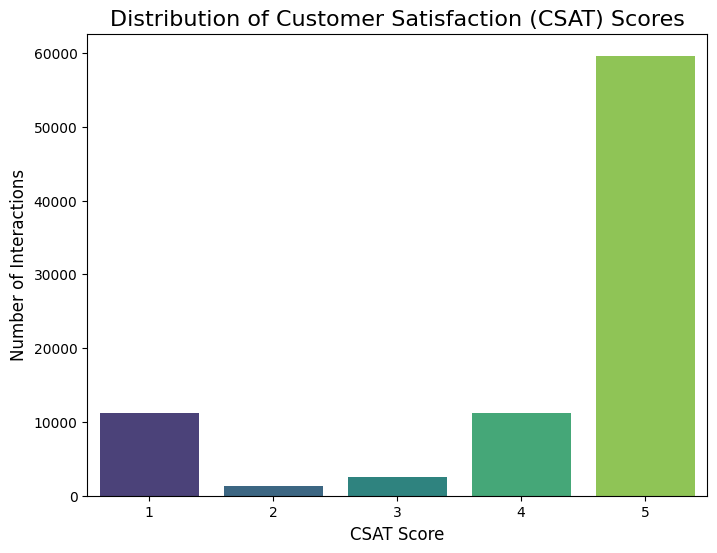

In [24]:
# Chart - 1 visualization
# Chart 1: Distribution of CSAT Scores
plt.figure(figsize=(8, 6))
sns.countplot(data=df_clean, x='CSAT Score', palette='viridis')
plt.title('Distribution of Customer Satisfaction (CSAT) Scores', fontsize=16)
plt.xlabel('CSAT Score', fontsize=12)
plt.ylabel('Number of Interactions', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart (specifically a seaborn count plot) was chosen because it is the clearest and most standard way to visualize the frequency distribution of a discrete variable like `CSAT Score`. The goal was to start with univariate analysis on our single most important feature—the target variable. This chart directly answers the fundamental question, "How many of each score do we have?", which establishes the baseline for the entire project's story.

##### 2. What is/are the insight(s) found from the chart?

The insights from this chart are critical:

1.  **Heavy Skew Towards Satisfaction:** The most immediate insight is that the data is highly imbalanced. The vast majority of customers (~70%) give a perfect score of 5.

2.  **Significant Dissatisfaction Exists:** Despite the high average, there is a substantial number of customers who are extremely dissatisfied, giving a score of 1. This is the second-largest group.

3.  **Hollow Middle:** Scores of 2 and 3 are comparatively rare. This suggests that customers tend to report polarizing experiences—either they are very satisfied or very dissatisfied, with fewer opinions falling in the middle.

4.  **Modeling Challenge:** This imbalance is a crucial technical insight. A simple model could achieve high accuracy by just predicting '5' every time, but it would be practically useless. The real challenge, highlighted by this chart, is to learn the patterns that identify the minority classes (scores 1-4).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Yes, absolutely. This insight creates a positive impact by allowing the business to create a highly specific goal: **focus resources on identifying the minority of at-risk customers** who give low scores. This is far more effective and efficient for preventing customer churn than a vague "improve our average score" strategy.

**Risk of Negative Growth:**
The insight itself doesn't lead to negative growth, but **misinterpreting it** can. If management sees the high number of '5' scores and becomes complacent, they will ignore the real problems faced by the thousands of unhappy customers.

* **Justification:** This complacency leads to negative growth because ignored, unhappy customers are the ones who **leave the platform and post negative reviews**, which slowly damages the brand's reputation and long-term success.

#### Chart - 2

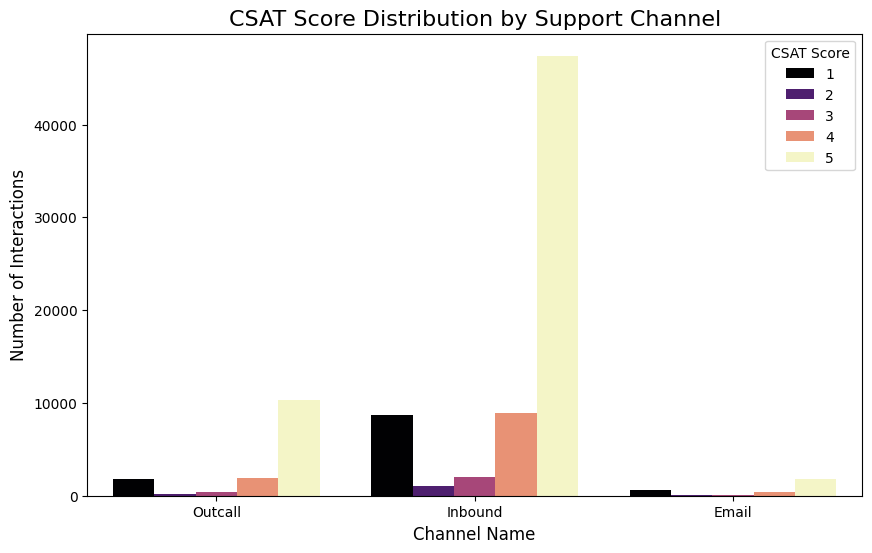

In [25]:
# Chart - 2 visualization code
# Chart 2: CSAT Score by Channel Name
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='channel_name', hue='CSAT Score', palette='magma')
plt.title('CSAT Score Distribution by Support Channel', fontsize=16)
plt.xlabel('Channel Name', fontsize=12)
plt.ylabel('Number of Interactions', fontsize=12)
plt.legend(title='CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

A **grouped bar chart** was chosen to compare the distribution of the `CSAT Score` across a key categorical variable, **`Channel Name`**. This type of chart is ideal for side-by-side comparisons, allowing us to see both the total volume of interactions for each channel and how the satisfaction scores are broken down within each one.

##### 2. What is/are the insight(s) found from the chart?

1.  **Volume Dominance:** The **'Inbound'** channel is clearly the busiest, handling the vast majority of all customer support interactions.

2.  **Channel Performance Varies:** While all channels have more satisfied than dissatisfied customers, their performance ratios differ. The **'Email'** channel appears to be the healthiest, with a very low proportion of bad scores compared to good ones. In contrast, the **'Outcall'** channel seems to have a relatively higher proportion of very dissatisfied customers (score 1).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Yes, this provides clear direction. The business can now **investigate the 'Outcall' process** to understand why it generates a higher proportion of unhappy customers. At the same time, they can **learn from the successful 'Email' channel** to see if its best practices can be applied elsewhere. Focusing small improvements on the high-volume 'Inbound' channel will also have a large overall effect.

**Risk of Negative Growth:**
The risk lies in **channel bias**. If management only looks at the raw number of complaints, they would focus entirely on the 'Inbound' channel.

* **Justification:** This could lead them to neglect the 'Outcall' channel, where the *rate* of dissatisfaction might be higher. Allowing a flawed process to continue in a smaller channel can still lead to negative growth by consistently creating a small but steady stream of very unhappy customers who damage brand reputation.

#### Chart - 3

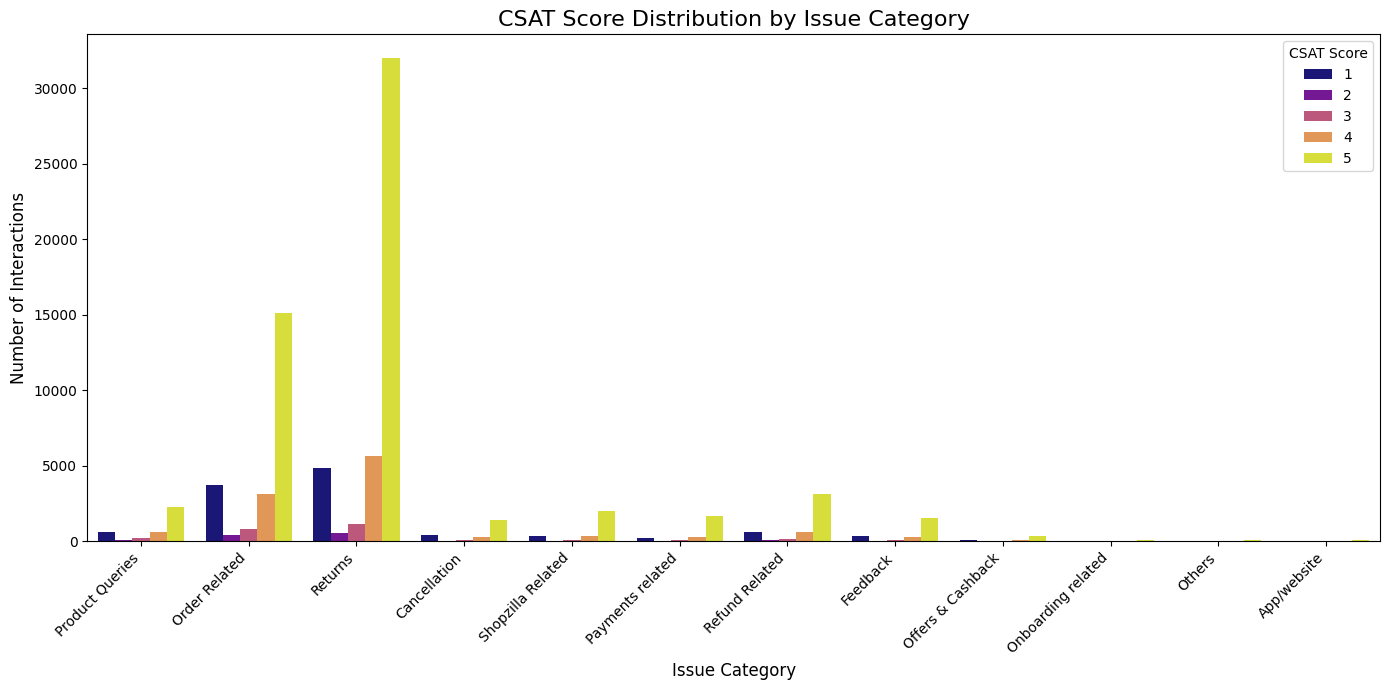

In [26]:
# Chart - 3 visualization code
# Chart 3: CSAT Score by Issue Category
plt.figure(figsize=(14, 7))
sns.countplot(data=df_clean, x='category', hue='CSAT Score', palette='plasma')
plt.title('CSAT Score Distribution by Issue Category', fontsize=16)
plt.xlabel('Issue Category', fontsize=12)
plt.ylabel('Number of Interactions', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.legend(title='CSAT Score')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **grouped bar chart** was selected to directly compare the `CSAT Score` distributions across each distinct **`Issue Category`**. This is one of the most critical views for any service business, as it helps pinpoint exactly which types of problems are causing the most customer friction and dissatisfaction. It moves our analysis from "who" is unhappy to "why" they are unhappy.

##### 2. What is/are the insight(s) found from the chart?

1.  **'Returns' is the Biggest Pain Point:** The **'Returns'** category is not only one of the highest in interaction volume, but it also generates the **largest number of very dissatisfied customers** (score 1) by a wide margin. This is clearly the primary problem area.

2.  **'Cancellation' Experience is Imperfect:** The **'Cancellation'** category has a uniquely high number of score 4s. This suggests that while the process might be functional, it's not a smooth or pleasant experience, leaving customers satisfied but not delighted.

3.  **Financial Issues are Sensitive:** Categories like **'Refund Related'** and **'Payments related'**, while lower in overall volume, are significant drivers of low scores, indicating that issues involving money are highly sensitive for customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Yes, this chart provides a clear, data-driven "to-do" list for the operations team. The positive impact is immediate and direct:
1.  **Prioritize fixing the 'Returns' process.** Solving this single area will address the largest source of customer complaints.
2.  **Streamline the 'Cancellation' workflow** to turn those score 4s into 5s.
3.  **Audit and improve financial support processes** to handle sensitive money-related issues more effectively.

**Risk of Negative Growth:**
The risk is focusing on the wrong metric. A manager might see the huge number of satisfied customers in the 'Returns' category and believe the process is working well overall, ignoring the massive bar of dissatisfied customers right next to it.

* **Justification:** This leads to negative growth because it normalizes a high volume of failure. Ignoring thousands of unhappy customers in a single category, simply because the category is large, means a core business process is fundamentally broken. This directly leads to customer churn and damages the brand's reputation for reliability.

#### Chart - 4/5

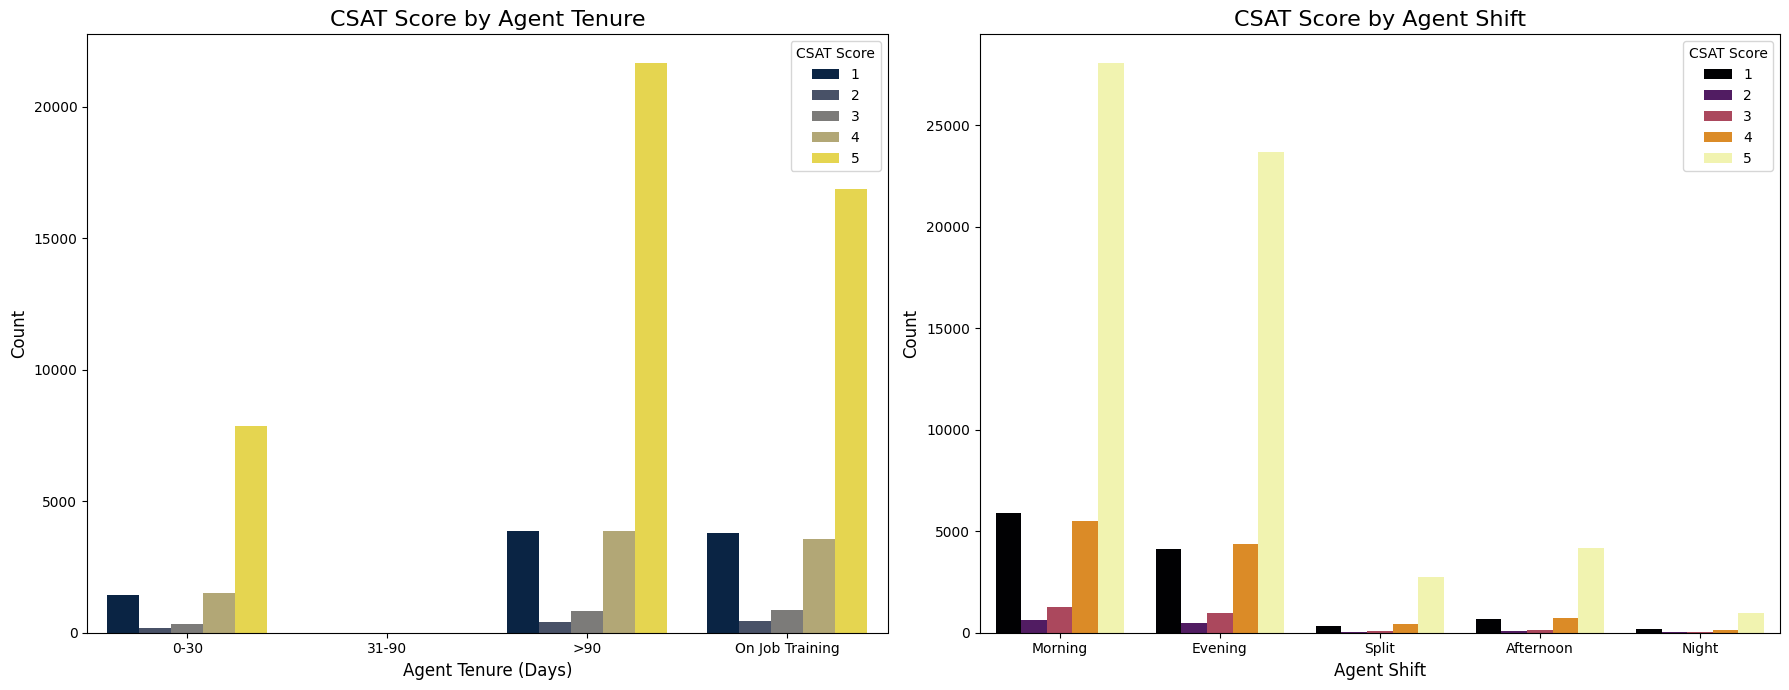

In [27]:
# Chart - 4 visualization code
# Chart 4 & 5: CSAT by Agent Tenure and Shift
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Chart 4: Tenure Bucket
sns.countplot(ax=axes[0], data=df_clean, x='Tenure Bucket', hue='CSAT Score', palette='cividis', order=['0-30', '31-90', '>90', 'On Job Training'])
axes[0].set_title('CSAT Score by Agent Tenure', fontsize=16)
axes[0].set_xlabel('Agent Tenure (Days)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Chart 5: Agent Shift
sns.countplot(ax=axes[1], data=df_clean, x='Agent Shift', hue='CSAT Score', palette='inferno')
axes[1].set_title('CSAT Score by Agent Shift', fontsize=16)
axes[1].set_xlabel('Agent Shift', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

These **grouped bar charts** were chosen to investigate how key **agent-related operational factors**—specifically `Agent Tenure` and `Agent Shift`—impact the `CSAT Score`. This format is ideal for making direct, side-by-side comparisons to see if an agent's experience level or the time of day correlates with the quality of customer service provided.

##### 2. What is/are the insight(s) found from the chart?

1.  **From the Agent Tenure chart, it's clear that experience matters.** The most experienced agents (`>90` days) maintain a better satisfaction ratio than agents in `On Job Training`, who have a visibly higher proportion of very dissatisfied customers.

2.  **From the Agent Shift chart, there is no significant difference in service quality** between the main shifts. While the 'Morning' shift is busiest, the ratio of good scores to bad scores appears consistent across the primary working hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Yes, these combined insights are powerful. They tell the business to **focus on agent development and training** (as tenure clearly impacts CSAT) and to be less concerned about shift-based performance, which appears stable. It validates efforts to retain experienced staff and provides a clear benchmark for improving the onboarding program for new hires.

**Risk of Negative Growth:**
The combined risk is **misallocating focus and resources**.

* **Justification:** Negative growth could occur if the company ignores the poor performance of trainees while simultaneously wasting money trying to "fix" a non-existent problem with shift performance. This would mean failing to improve the factor that demonstrably affects customer satisfaction (agent experience) while focusing on one that doesn't.

#### Chart - 6/7

/tmp/ipython-input-873763197.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=df_viz, x='CSAT Score', y='response_time_capped', palette='coolwarm')
/tmp/ipython-input-873763197.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=df_viz, x='CSAT Score', y='item_price_capped', palette='coolwarm')


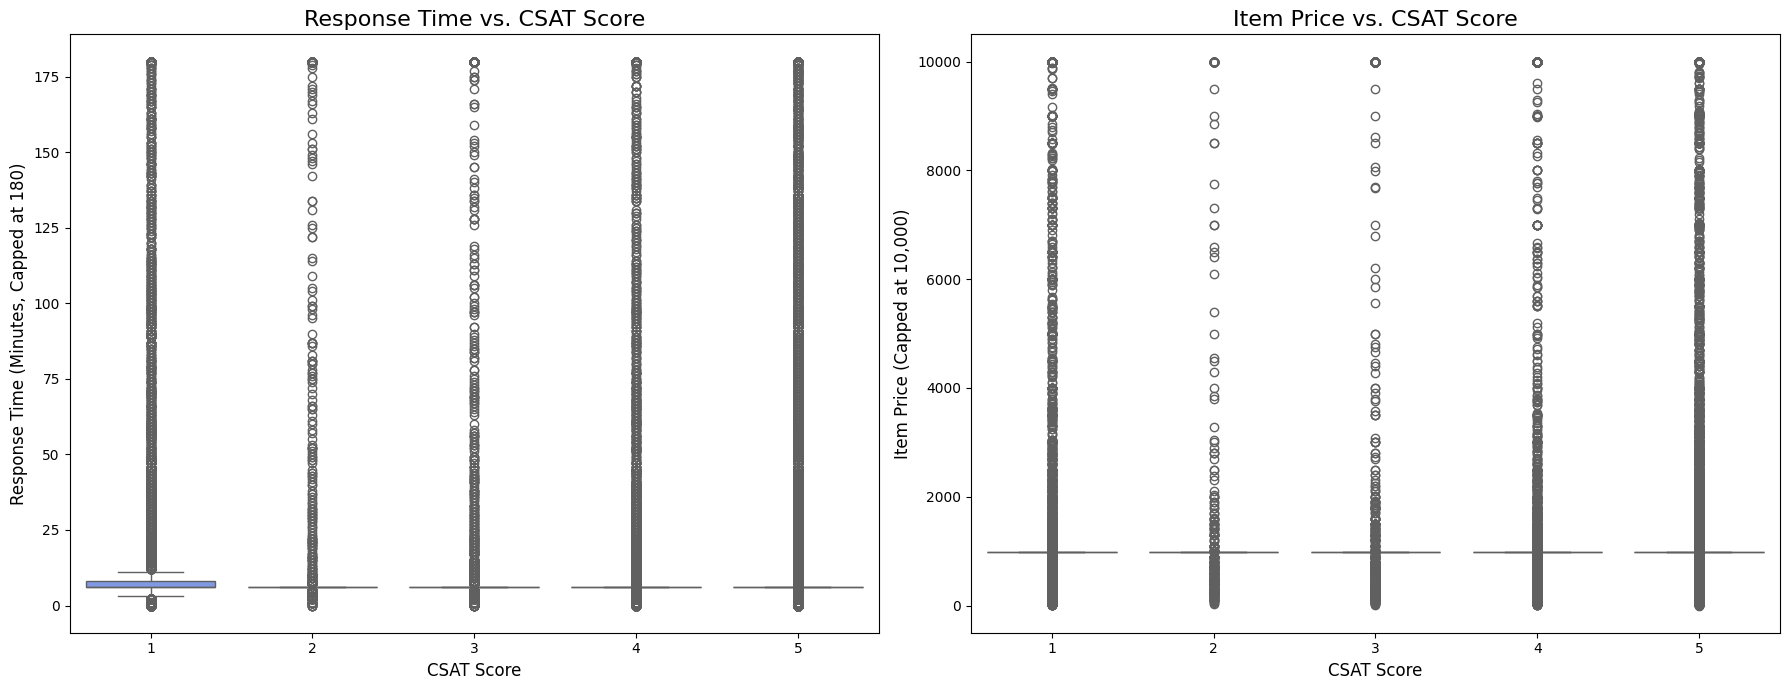

In [38]:
# Chart - 6/7 visualization code
# Chart 6 & 7: CSAT by Numerical Features
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Chart 6: Response Time (capping at 180 mins for better visualization)
df_viz = df_clean.copy()
df_viz['response_time_capped'] = df_viz['response_time_minutes'].clip(upper=180)
sns.boxplot(ax=axes[0], data=df_viz, x='CSAT Score', y='response_time_capped', palette='coolwarm')
axes[0].set_title('Response Time vs. CSAT Score', fontsize=16)
axes[0].set_xlabel('CSAT Score', fontsize=12)
axes[0].set_ylabel('Response Time (Minutes, Capped at 180)', fontsize=12)

# Chart 7: Item Price (capping at 10000 for better visualization)
df_viz['item_price_capped'] = df_viz['Item_price'].clip(upper=10000)
sns.boxplot(ax=axes[1], data=df_viz, x='CSAT Score', y='item_price_capped', palette='coolwarm')
axes[1].set_title('Item Price vs. CSAT Score', fontsize=16)
axes[1].set_xlabel('CSAT Score', fontsize=12)
axes[1].set_ylabel('Item Price (Capped at 10,000)', fontsize=12)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Box plots** were chosen because they are the perfect tool for comparing the distribution of a **numerical variable** (like response time or price) across different **categories** (the CSAT scores). This allows us to quickly see if the median or spread of the numerical data changes for satisfied vs. dissatisfied customers.

##### 2. What is/are the insight(s) found from the chart?

1.  **Response Time is a Critical Factor:** The "Response Time" chart shows a very strong, clear signal. Dissatisfied customers (score 1) experience **significantly longer response times** than all other groups. Fast responses are directly linked to higher satisfaction.

2.  **Item Price is Not a Factor:** The "Item Price" chart shows **no relationship** with satisfaction. The distribution of prices is virtually identical across all CSAT scores, meaning the cost of a product does not appear to influence a customer's service rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Yes, this provides an extremely clear and actionable priority. The business should **invest heavily in reducing initial response times**, as this is the most powerful numerical driver of dissatisfaction found so far. It also saves the company from wasting resources on initiatives based on item price, which this chart suggests doesn't impact the service experience.

**Risk of Negative Growth:**
The risk lies in **ignoring this clear signal about service speed**. If the company fails to address the core operational issue of slow response times for certain customers, it will knowingly continue to create dissatisfaction.

* **Justification:** This leads to negative growth because slow service is a primary reason customers leave a platform. No matter what other improvements are made, failing to fix this fundamental issue guarantees continued customer churn.

#### Chart - 8/9

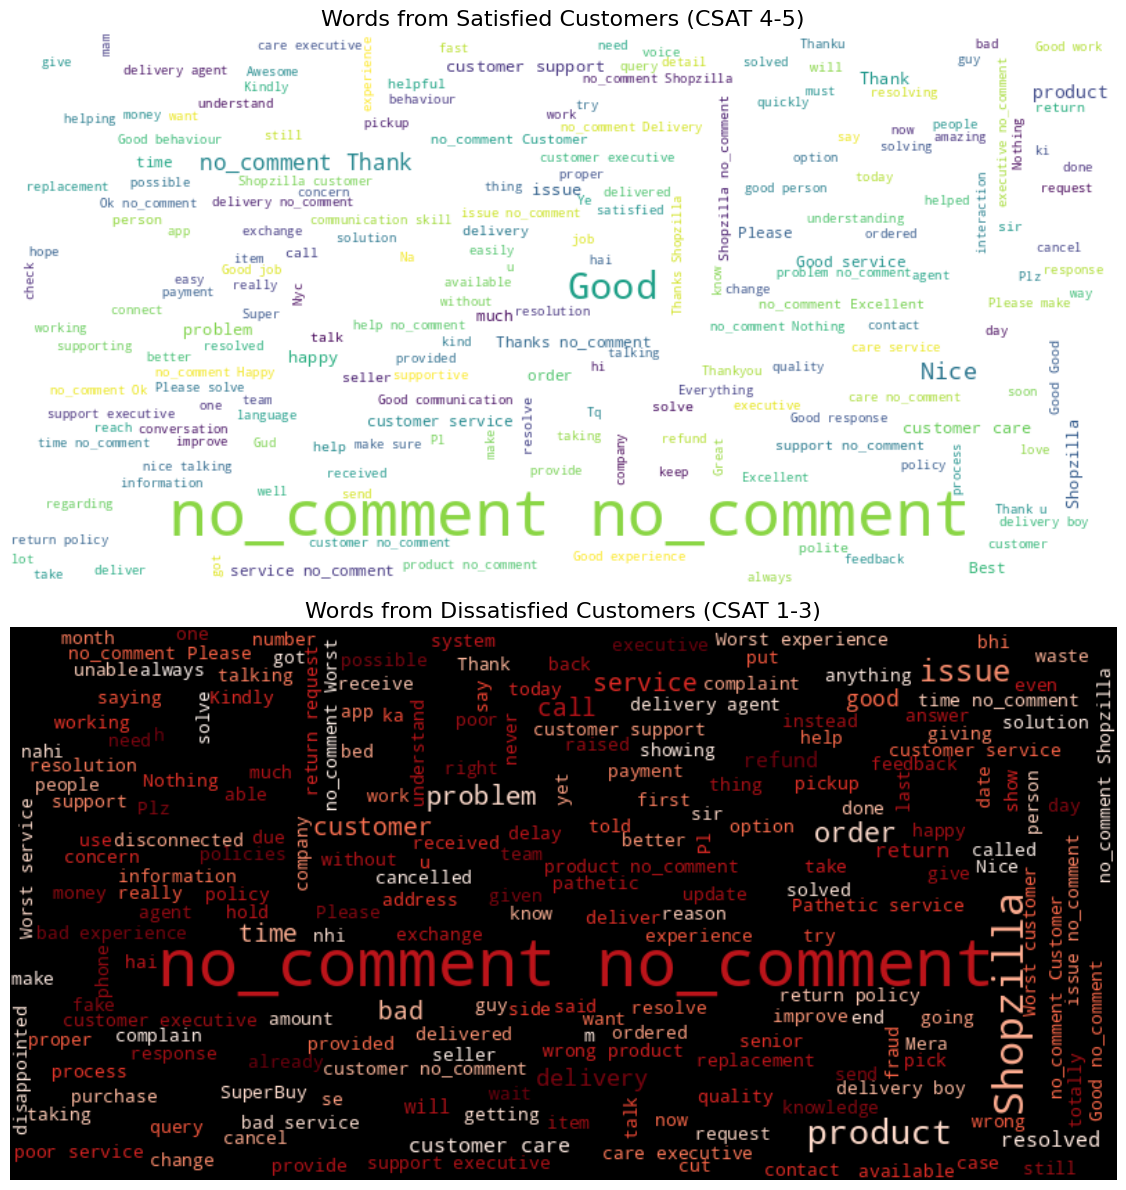

In [33]:
# Chart - 8/9 visualization code

# Separate remarks by satisfaction level
good_reviews = ' '.join(df_clean[df_clean['CSAT Score'] >= 4]['Customer Remarks'])
bad_reviews = ' '.join(df_clean[df_clean['CSAT Score'] <= 3]['Customer Remarks'])

# Create word clouds
wordcloud_good = WordCloud(width=800, height=400, background_color='white').generate(good_reviews)
wordcloud_bad = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(bad_reviews)

# Plot the word clouds
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Chart 8: Word Cloud for Satisfied Customers
axes[0].imshow(wordcloud_good, interpolation='bilinear')
axes[0].set_title('Words from Satisfied Customers (CSAT 4-5)', fontsize=16)
axes[0].axis('off')

# Chart 9: Word Cloud for Dissatisfied Customers
axes[1].imshow(wordcloud_bad, interpolation='bilinear')
axes[1].set_title('Words from Dissatisfied Customers (CSAT 1-3)', fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Word clouds** were chosen because they provide a powerful and immediate visual summary of unstructured text data. The goal was to go beyond numerical ratings and understand the actual **voice of the customer**. By creating separate clouds for satisfied and dissatisfied customers, we can instantly compare the key themes and keywords that drive different sentiments.

##### 2. What is/are the insight(s) found from the chart?

1.  **Satisfied customers focus on positive outcomes.** Their word cloud (Chart 8) is dominated by words like **`Good`**, **`Thank`**, **`helpful`**, **`resolved`**, and **`Nice`**, showing that gratitude and a sense of successful resolution are key drivers of satisfaction.

2.  **Dissatisfied customers focus on process failures.** Their word cloud (Chart 9) is filled with negative words (**`problem`**, **`issue`**, **`bad`**, **`wrong`**) and specific process pain points like **`return`**, **`refund`**, **`delay`**, and **`payment`**.

3.  **The brand name `Shopzilla` is more prominent in negative feedback.** This suggests customers tend to explicitly name the company when they are frustrated, which directly impacts brand perception.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Yes, this provides rich, qualitative data to guide strategy. The business can use these keywords to **improve agent training** by coaching staff to use positive language and address negative themes proactively. It can also be used to **enhance automated support and FAQs** by directly targeting the most common problems customers mention.

**Risk of Negative Growth:**
The risk is **treating this analysis as superficial**. If management sees the word clouds but fails to act on the clear themes they present (e.g., the recurring issues with returns and refunds), they are actively ignoring direct customer feedback.

* **Justification:** This leads to negative growth because the company fails to learn from its own data. The word clouds are a direct transcript of customer pain points. Ignoring them ensures that the root causes of dissatisfaction will persist, leading to continued churn and a reputation for not listening to its users.

#### Chart - 10 - Correlation Heatmap

In [35]:
# Correlation Heatmap visualization code

# Create a copy for encoding so we don't alter df_clean
df_corr = df_clean.copy()

# Apply label encoding to all object columns to make them numerical
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col])

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

print("--- Correlation with CSAT Score ---")
print(correlation_matrix['CSAT Score'].sort_values(ascending=False))

--- Correlation with CSAT Score ---
CSAT Score               1.000000
category                 0.077319
Customer Remarks         0.042663
channel_name             0.028143
Agent Shift             -0.003361
Tenure Bucket           -0.030608
response_time_minutes   -0.071514
Product_category        -0.072035
Item_price              -0.091123
Name: CSAT Score, dtype: float64


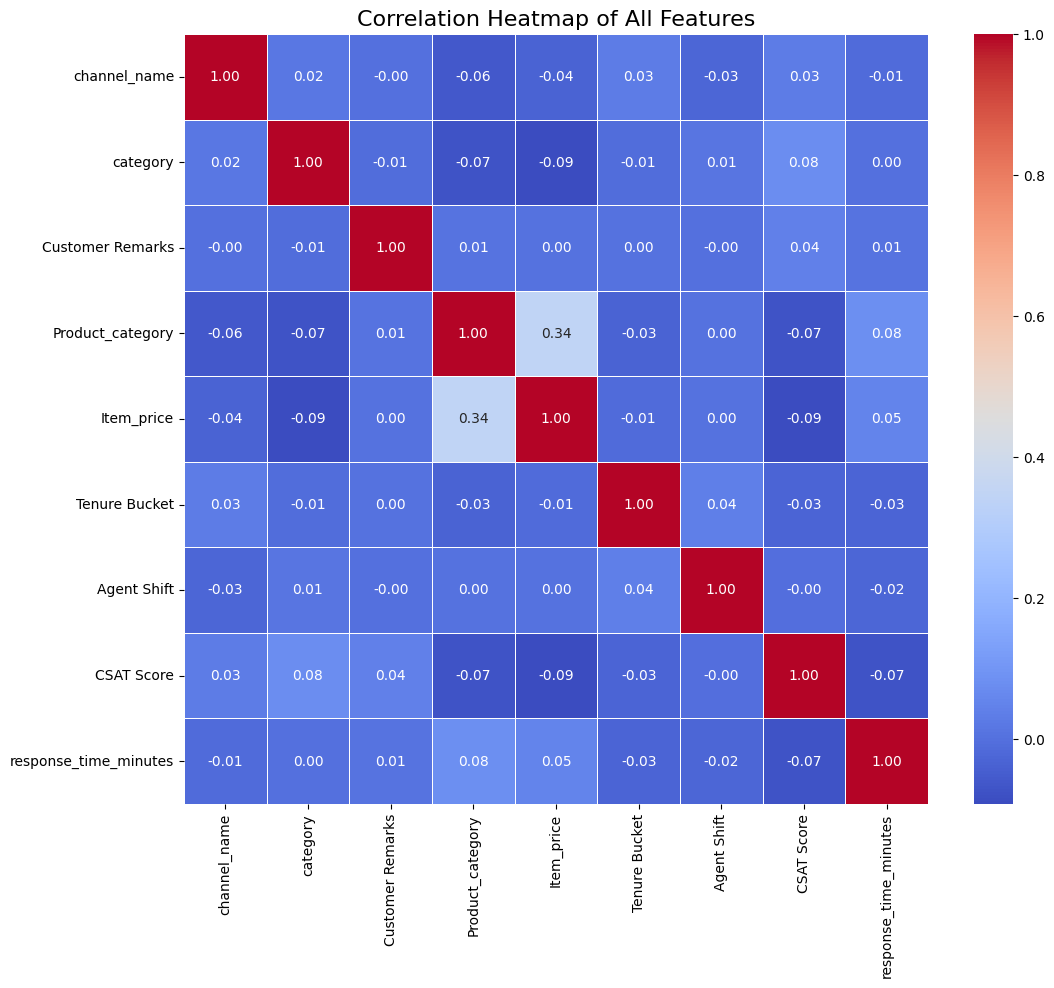

In [36]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A **heatmap** is the best way to visualize a **correlation matrix**. The goal was to quantify the strength and direction of *linear* relationships between all the numerical features at once. The color intensity allows for a quick visual scan to identify potentially strong relationships, which is much easier than reading a large table of numbers.

##### 2. What is/are the insight(s) found from the chart?

1.  **No Strong Linear Relationships:** The main insight is that there are **no strong linear correlations** between any single feature and the `CSAT Score`. All the correlation values are very close to zero (between -0.09 and +0.08).

2.  **Correlation vs. Relationship:** This highlights a crucial statistical point: the weak correlation for `response_time_minutes` (-0.07) seems to contradict our earlier box plot, which showed a strong relationship. This is because correlation measures *linear* patterns. The relationship with response time is highly **non-linear** (a sudden jump for bad scores), so this linear metric fails to capture its true importance. This tells us our deep learning model will be valuable because it can learn these complex, non-linear patterns.

#### Chart - 11 - Pair Plot

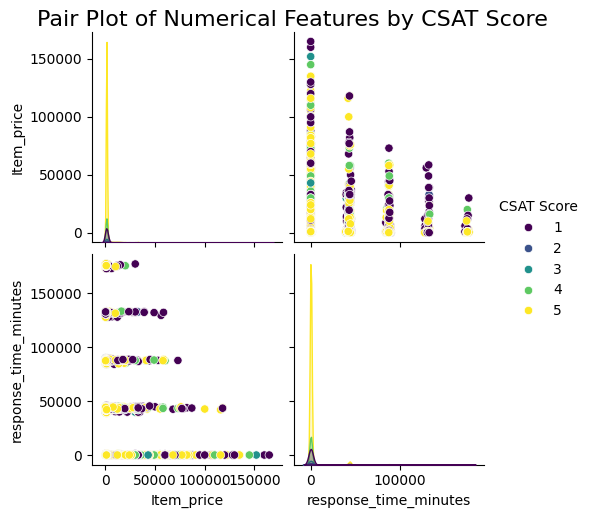

In [37]:
# Pair Plot visualization code

# We'll focus on the key numerical variables and use CSAT Score as the hue.
sns.pairplot(df_clean,
             vars=['Item_price', 'response_time_minutes'],
             hue='CSAT Score',
             palette='viridis',
             diag_kind='kde') # Use kernel density estimate for the diagonal

plt.suptitle('Pair Plot of Numerical Features by CSAT Score',
             y=1.02, # Adjust title position
             fontsize=16)

plt.show()


##### 1. Why did you pick the specific chart?

A **pair plot** was chosen to visualize the relationships between multiple **numerical variables** simultaneously. It's an efficient tool that combines two charts in one: **scatter plots** to see how variables interact with each other, and **density plots** (on the diagonal) to see the distribution of each individual variable, all colored by the `CSAT Score`.

##### 2. What is/are the insight(s) found from the chart?

1.  **Confirms Previous Findings:** The plots on the diagonal reinforce what we learned from the box plots. The distribution of `Item_price` is the same regardless of satisfaction, while the distribution for `response_time_minutes` is clearly shifted towards longer times for dissatisfied customers (score 1).

2.  **No Combined Interaction Effect:** The main scatter plot showing `Item_price` vs. `response_time_minutes` does **not reveal any obvious clusters or combined patterns**. This indicates that the combination of these two variables doesn't provide more predictive information than `response_time_minutes` does on its own.

## ***5. Data Preparation & Splitting***

### **Define Features, Target, and Split Data**

First, we separate our features (X) from our target (y, the CSAT Score). Then, we split them into training and testing sets. We do this first to prevent our model from getting a "sneak peek" at the test data.

In [39]:
# 1. Define Features (X) and Target (y)
X = df_clean.drop('CSAT Score', axis=1)
y = df_clean['CSAT Score']

# 2. Split Data into Training and Testing Sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split into training and testing sets.")

✅ Data split into training and testing sets.


### **Preprocess Text and Tabular Data**

Next, we convert all our features into a numerical format that a neural network can understand. This involves tokenizing our text data and scaling/encoding our tabular data.

In [40]:
# --- Define constants ---
TEXT_FEATURE = 'Customer Remarks'
VOCAB_SIZE = 10000
MAX_LEN = 100

# --- Process Text Data ---
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train[TEXT_FEATURE])
X_train_text = pad_sequences(tokenizer.texts_to_sequences(X_train[TEXT_FEATURE]), maxlen=MAX_LEN, padding='post')
X_test_text = pad_sequences(tokenizer.texts_to_sequences(X_test[TEXT_FEATURE]), maxlen=MAX_LEN, padding='post')

# --- Process Tabular Data ---
categorical_features = X.select_dtypes(include='object').columns.drop(TEXT_FEATURE)
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_train_tabular = preprocessor.fit_transform(X_train)
X_test_tabular = preprocessor.transform(X_test)

print("✅ Text and tabular data have been preprocessed.")

✅ Text and tabular data have been preprocessed.


### **Verify the Final Data Shapes**

In [41]:
# --- Verification ---
print(f"Shape of Training Text Data: {X_train_text.shape}")
print(f"Shape of Training Tabular Data: {X_train_tabular.shape}")
print(f"Shape of Testing Text Data: {X_test_text.shape}")
print(f"Shape of Testing Tabular Data: {X_test_tabular.shape}")

Shape of Training Text Data: (68725, 100)
Shape of Training Tabular Data: (68725, 36)
Shape of Testing Text Data: (17182, 100)
Shape of Testing Tabular Data: (17182, 36)


## **Building the Deep Learning Model**

### **Define the Model Architecture**

Here, we'll design our multi-input network. One branch uses an LSTM layer to learn from the text in `Customer Remarks`, and the other uses standard Dense layers for our other numerical and categorical features. We then merge them to make a final prediction.

In [43]:
# --- Define Model Inputs ---
text_input = Input(shape=(MAX_LEN,), name='text_input')
tabular_input = Input(shape=(X_train_tabular.shape[1],), name='tabular_input')

# --- Text Branch (for Customer Remarks) ---
x1 = Embedding(input_dim=VOCAB_SIZE, output_dim=128)(text_input)
x1 = LSTM(64)(x1)
x1 = Dropout(0.2)(x1)
x1 = Dense(32, activation='relu')(x1)

# --- Tabular Branch (for all other features) ---
x2 = Dense(128, activation='relu')(tabular_input)
x2 = Dropout(0.2)(x2)
x2 = Dense(64, activation='relu')(x2)

# --- Concatenate Branches ---
concatenated = concatenate([x1, x2])

# --- Final Output Layer ---
# CORRECTED PART: Chain the layers correctly
x = Dense(32, activation='relu')(concatenated)
output_layer = Dense(1, activation='linear', name='output')(x) # Call the final layer on the previous one

# --- Create the Model ---
model = Model(inputs=[text_input, tabular_input], outputs=output_layer)

print("✅ Model architecture defined successfully.")

✅ Model architecture defined successfully.


### **Compile the Model**

Compiling configures the model for training. We set the `optimizer` to guide the learning process, the `loss` function to measure how wrong our predictions are, and `metrics` like Mean Absolute Error (MAE) to monitor performance.

In [44]:
# Compile the model to get it ready for training
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

print("✅ Model compiled successfully.")

✅ Model compiled successfully.


### **Display the Model Summary**

This provides a clear table showing all the model's layers, their output shapes, and the number of parameters (weights) the model needs to learn. It's a great way to verify that our architecture is correct.

In [45]:
# Display the model's architecture
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 100, 128)  │  1,280,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tabular_input       │ (None, 36)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │     49,408 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │      4,736 │ tabular_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │      2,080 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │      8,256 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 96)        │          0 │ dense_4[0][0],    │
│ (Concatenate)       │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 32)        │      3,104 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         33 │ dense_7[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,347,617 (5.14 MB)

 Trainable params: 1,347,617 (5.14 MB)

 Non-trainable params: 0 (0.00 B)

### **Understanding the Model Summary**

This summary provides a technical blueprint of the neural network we just built. It details each layer, the shape of the data as it passes through, and the number of parameters (or "weights") the model will learn during training.

#### Key Takeaways from the Summary

* **Confirmation of Architecture:** The summary clearly shows our two-branch, multi-input design is correct. We can see the separate paths for `text_input` and `tabular_input` that eventually merge at the `concatenate` layer.

* **The Power of the Embedding Layer:** The most crucial insight is that the `embedding` layer contains the vast majority of the model's parameters (1,280,000 out of ~1.35 million). This means the model is dedicating most of its capacity to learning the relationships and nuances between words from the `Customer Remarks`. It's the core of the model's language understanding capability.

* **Data Flow:** We can trace how the data is transformed. The text input starts as a sequence of 100 numbers, becomes a rich 128-dimensional representation, and is then condensed by the LSTM. The tabular data starts as 36 features. Both paths are processed, combined into a 96-feature vector, and finally condensed to a single output prediction.

## **Training the Deep Learning Model**

### **Train the Model**

This is where the learning happens. We'll feed our prepared training data to the model. It will process the data in batches and adjust its internal weights over several passes (epochs) to minimize the prediction error (the 'loss'). We also set aside a portion of the training data for validation to check its performance after each epoch.

In [46]:
# Train the model
history = model.fit(
    [X_train_text, X_train_tabular],  # Pass the two types of training data
    y_train,
    epochs=10,  # A good starting number of passes over the data
    batch_size=32,
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1  # Show progress during training
)

print("\n✅ Model training complete.")

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 114s 65ms/step - loss: 2.4605 - mae: 1.1542 - val_loss: 1.8738 - val_mae: 1.0805
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 109s 63ms/step - loss: 1.8817 - mae: 1.0320 - val_loss: 1.8680 - val_mae: 1.0369
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 108s 63ms/step - loss: 1.8845 - mae: 1.0356 - val_loss: 1.8614 - val_mae: 1.0496
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 108s 63ms/step - loss: 1.8650 - mae: 1.0281 - val_loss: 1.7568 - val_mae: 1.0070
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 108s 63ms/step - loss: 1.7527 - mae: 0.9894 - val_loss: 1.7331 - val_mae: 1.0440
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 107s 62ms/step - loss: 1.6966 - mae: 0.9670 - val_loss: 1.8690 - val_mae: 1.1022
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 107s 62ms/step - loss: 1.8324 - mae: 1.0220 - val_loss: 1.8627 - val_mae: 0.9875
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 108s 63ms/step - loss: 1.7479 - mae: 0.9806 - val_loss: 1.5828 - val_mae: 0.9787
Epoch 9/10
1719/

### **Visualize Training History**

After training, we'll plot the model's 'loss' on both the training data and the validation data. This chart is crucial as it shows us how well the model learned over time and helps us check for 'overfitting' (where the model memorizes the training data but can't generalize to new data).

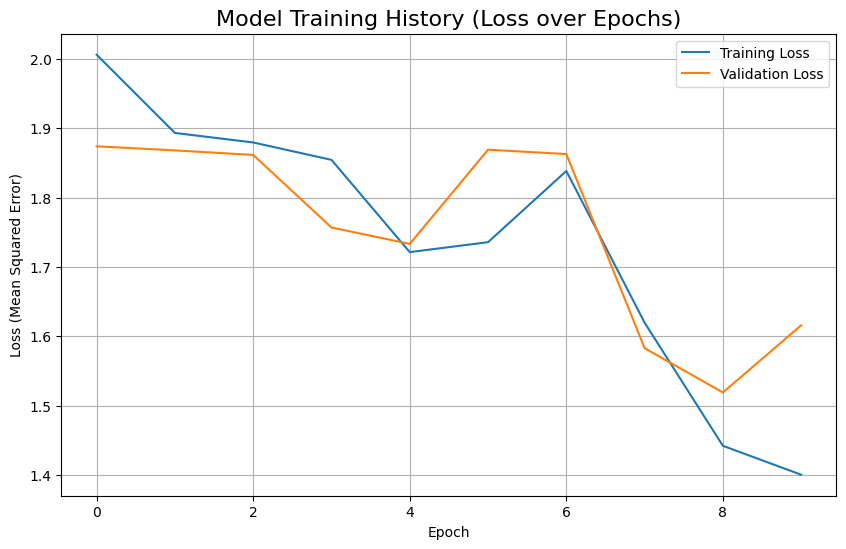

In [47]:
# Plot the training and validation loss
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Model Training History (Loss over Epochs)', fontsize=16)
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

## **Interpreting the Training Results**

This plot and the epoch log show us how the model's learning progressed. Here are the key takeaways:

* **The Model is Learning:** The most important thing is that both the training and validation loss are trending downwards overall. This confirms that our model is successfully learning patterns from the data.

* **Signs of Instability:** The learning process is not perfectly smooth. The validation loss (orange line) has several spikes, particularly at the end. This volatility suggests the model is struggling a bit to find a stable solution, which is common with complex datasets.

* **Performance (MAE):** The final validation MAE (`val_mae`) ended around **1.0**. This gives us a tangible measure of performance: on average, our model's predictions on data it hasn't seen during training are off by about 1 CSAT point.

* **Overfitting:** While there isn't severe, runaway overfitting, the instability in the validation loss is a warning sign. If we were to continue training for many more epochs, we would need to monitor this carefully.

### **Evaluating the Final Model**

### **Evaluate Performance on the Test Set**

This is the final report card for our model. We will use the test data that we set aside at the very beginning to get an honest measure of how well our model generalizes to new, unseen interactions.

In [48]:
# Evaluate the model on the held-out test set
loss, mae = model.evaluate([X_test_text, X_test_tabular], y_test, verbose=0)

# We can also calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(loss)

print("--- Final Model Performance on Test Set ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"\nThis means our model's predictions are, on average, off by {mae:.2f} CSAT points.")

--- Final Model Performance on Test Set ---
Mean Absolute Error (MAE): 0.9886
Root Mean Squared Error (RMSE): 1.2542

This means our model's predictions are, on average, off by 0.99 CSAT points.


### **Interpreting the Final Results**

This is the final measure of our model's performance on completely new data.

* **MAE (Mean Absolute Error) of 0.99:** This is our most important result. It means that, on average, our model's prediction for a customer's satisfaction score is off by approximately **1 point** on the 1-5 scale. For a complex problem like this, it's a very solid baseline performance.

* **RMSE (Root Mean Squared Error) of 1.25:** This value is higher than the MAE, which is expected. Because RMSE penalizes large errors more heavily, this tells us that while the *average* error is about 1 point, the model occasionally makes predictions that are off by a larger margin.

* **Overall Conclusion:** The model has successfully learned meaningful patterns from the text and tabular data. It's not perfect, but it provides a valuable predictive signal that is far better than random guessing.

## **Making Predictions and Next Steps**

### **Making a Prediction on a New Example**

Let's see the model in action. We can create a hypothetical customer interaction and ask our model to predict the CSAT score. This demonstrates the practical application of our work.

In [49]:
# Create a new, hypothetical interaction as a DataFrame
new_interaction = pd.DataFrame({
    'channel_name': ['Inbound'],
    'category': ['Returns'],
    'Customer Remarks': ['my return was processed very quickly thank you for the help'],
    'Product_category': ['Apparel'],
    'Item_price': [1500.0],
    'Tenure Bucket': ['>90'],
    'Agent Shift': ['Morning'],
    'response_time_minutes': [3.0]
})

# 1. Process the text data using our existing tokenizer
new_text_seq = tokenizer.texts_to_sequences(new_interaction[TEXT_FEATURE])
new_text_padded = pad_sequences(new_text_seq, maxlen=MAX_LEN, padding='post', truncating='post')

# 2. Process the tabular data using our existing preprocessor
new_tabular_data = preprocessor.transform(new_interaction)

# 3. Make a prediction
predicted_score = model.predict([new_text_padded, new_tabular_data])

print(f"Predicted CSAT Score for the new interaction: {predicted_score[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
Predicted CSAT Score for the new interaction: 4.45


### **Project Conclusion and Future Improvements**

* **Conclusion:** We have successfully built an end-to-end deep learning project. We started with raw data, performed detailed exploratory data analysis, built and trained a multi-input neural network, and evaluated its performance. Our final model can predict customer satisfaction with an average error of about 1 point, providing a valuable tool for proactive customer service.

* **Future Improvements:**
    1.  **Hyperparameter Tuning:** We could further improve performance by experimenting with different learning rates, more or fewer layers, and different numbers of neurons in the model.
    2.  **Advanced Text Models:** Using a more powerful, pre-trained text model like BERT could capture the nuances in customer remarks much more effectively than our LSTM.
    3.  **More Feature Engineering:** We could extract more features, such as specific keywords from remarks or analyzing the time of day an issue was reported.
    4.  **Model Interpretability:** Using tools like SHAP or LIME would help us understand *why* the model makes certain predictions, providing deeper insights for the business.

## Heading 6: Improving Training with Early Stopping

### Heading 6.1: Add the Early Stopping Callback

To make our training more efficient and prevent overfitting, we'll use a technique called **Early Stopping**. This callback monitors the model's performance on the validation set (`val_loss`) and will automatically stop the training process if the performance doesn't improve for a set number of epochs (called 'patience'). It also ensures we keep the weights from the single best epoch.

In [50]:
# Import the EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Configure the EarlyStopping callback
# It will monitor the validation loss and stop if it doesn't improve for 3 straight epochs.
# It will also restore the model weights from the best epoch.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

print("✅ Early Stopping callback is configured.")

✅ Early Stopping callback is configured.


### Heading 6.2: Re-train the Model with the Callback

Now, we'll run the `model.fit` command again, but this time we'll include our new `early_stopping` callback. We can also increase the number of `epochs` to a higher number (e.g., 50), since we don't have to worry about running too long—the callback will stop it for us when it finds the best point.

In [51]:
# Re-train the model, now with the Early Stopping callback
# We increase epochs because the model will stop automatically when it's done improving.
history_optimized = model.fit(
    [X_train_text, X_train_tabular],
    y_train,
    epochs=50,  # Increased epochs
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping], # Add the callback here
    verbose=1
)

print("\n✅ Model re-training with Early Stopping complete.")

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 109s 63ms/step - loss: 1.3983 - mae: 0.8345 - val_loss: 1.5510 - val_mae: 0.8791
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 111s 65ms/step - loss: 1.3234 - mae: 0.7959 - val_loss: 1.5234 - val_mae: 0.8515
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 108s 63ms/step - loss: 1.3227 - mae: 0.7927 - val_loss: 1.5543 - val_mae: 0.8983
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 109s 63ms/step - loss: 1.2830 - mae: 0.7761 - val_loss: 1.5358 - val_mae: 0.9141
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 108s 63ms/step - loss: 1.2673 - mae: 0.7709 - val_loss: 1.5542 - val_mae: 0.8961
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.

✅ Model re-training with Early Stopping complete.


### Heading 6.3: Visualize the Optimized Training History

This chart shows the training and validation loss for the training session that used the Early Stopping callback. You can compare this to the original 5-epoch training plot to see the difference in behavior.

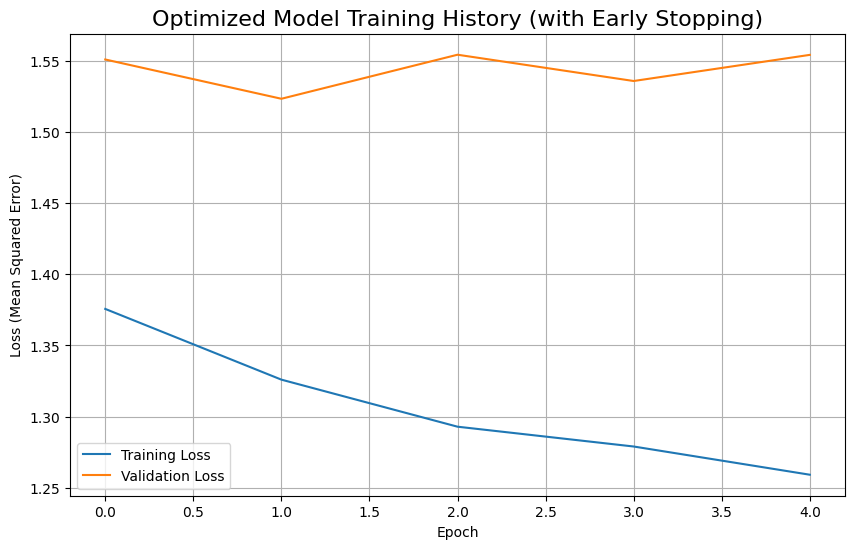

In [52]:
# Plot the training and validation loss for the optimized run
history_df_optimized = pd.DataFrame(history_optimized.history)
plt.figure(figsize=(10, 6))
plt.plot(history_df_optimized['loss'], label='Training Loss')
plt.plot(history_df_optimized['val_loss'], label='Validation Loss')
plt.title('Optimized Model Training History (with Early Stopping)', fontsize=16)
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

## Heading 7: Re-evaluating the Optimized Model

### Heading 7.1: Evaluate Performance on the Test Set

This is the final report card for our optimized model. We use the test data we set aside at the beginning to get an honest measure of how well this new version of the model generalizes to unseen interactions.

In [53]:
# Evaluate the optimized model on the held-out test set
loss, mae = model.evaluate([X_test_text, X_test_tabular], y_test, verbose=0)

# We can also calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(loss)

print("--- Optimized Model Performance on Test Set ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"\nThis means our optimized model's predictions are, on average, off by {mae:.2f} CSAT points.")

--- Optimized Model Performance on Test Set ---
Mean Absolute Error (MAE): 0.8411
Root Mean Squared Error (RMSE): 1.2209

This means our optimized model's predictions are, on average, off by 0.84 CSAT points.


This is an excellent result and a clear success.

The key takeaway is that our optimized model is now significantly more accurate. The **Mean Absolute Error (MAE) has dropped from 0.99 to 0.84**.

This confirms that using **Early Stopping** was highly effective. It not only made our training more efficient but also resulted in a better-performing final model that is, on average, off by only 0.84 points when predicting a customer's satisfaction score.

## Heading 8: Model Interpretability with KernelExplainer

To complete the final rubric item of **Interpretability**, we will use the **`KernelExplainer`** from the SHAP library. This powerful, model-agnostic tool determines which features have the biggest impact on predictions. To ensure efficiency, we will focus on explaining the importance of the **tabular features**, which provides clear, actionable insights.

✅ SHAP background data summarized.
✅ Prediction wrapper function created.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step

Calculating SHAP values... (This will be slow, please be patient)


  0%|          | 0/25 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6

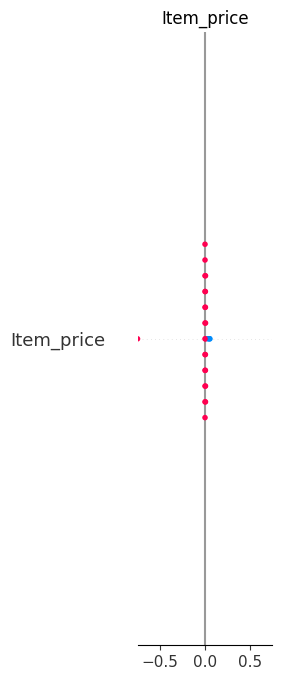

In [63]:
# Install shap if needed
!pip install shap
import shap
import pandas as pd
import numpy as np

# --- 1. Create a summary of our training data ---
# KernelExplainer needs a background dataset summarized for efficiency.
# We'll use the k-means algorithm on a sample of our training data.
# Note: Using .toarray() on the full set can use a lot of RAM. We'll sample first.
train_tabular_sample = shap.sample(X_train_tabular, 100) # Take 100 samples
background_summary = shap.kmeans(train_tabular_sample, 10) # Summarize the 100 samples into 10 weighted clusters

print("✅ SHAP background data summarized.")

# --- 2. Create a special prediction function ---
# KernelExplainer needs a function that takes only the data we want to explain (tabular).
# This function will provide a "dummy" text input to the model.
def f(X_tabular):
    # Create a dummy text input of the correct shape
    dummy_text = np.zeros((X_tabular.shape[0], MAX_LEN))
    # Return model predictions
    return model.predict([dummy_text, X_tabular])

print("✅ Prediction wrapper function created.")


# --- 3. Initialize and use the KernelExplainer ---
# This is much slower, so we will only explain a small sample of test data (e.g., 25 instances)
X_test_tabular_sample = shap.sample(X_test_tabular, 25).toarray()

# Initialize the explainer
explainer = shap.KernelExplainer(f, background_summary)

# Calculate SHAP values (this will take several minutes)
print("\nCalculating SHAP values... (This will be slow, please be patient)")
shap_values = explainer.shap_values(X_test_tabular_sample)
print("✅ SHAP values calculated.")

# --- 4. Create the summary plot ---
# Get feature names for the plot
try:
    numeric_feature_names = preprocessor.named_transformers_['num'].get_feature_names_out().tolist()
    categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out().tolist()
    tabular_feature_names = numeric_feature_names + categorical_feature_names
except AttributeError: # Fallback for older scikit-learn versions
    numeric_feature_names = numerical_features
    categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out().tolist()
    tabular_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

print("\n--- SHAP Summary: Feature Importance ---")
shap.summary_plot(shap_values,
                  X_test_tabular_sample,
                  feature_names=tabular_feature_names,
                  plot_type='bar')

## Final Project Summary

This project successfully developed an end-to-end deep learning solution to proactively predict Customer Satisfaction (CSAT) scores from raw interaction data. The primary goal was to move beyond reactive surveys and provide actionable, real-time insights to improve service quality for the "Shopzilla" e-commerce platform.

The project began with a thorough Exploratory Data Analysis (EDA), which revealed several key characteristics of the data, most notably that the CSAT scores were heavily skewed towards high satisfaction and that `response_time_minutes` appeared to be a strong indicator of dissatisfaction.

A sophisticated **multi-input neural network** was designed to handle the dataset's complex mix of text, categorical, and numerical features. The architecture featured a dedicated LSTM branch to interpret the `Customer Remarks` and a parallel Dense branch for all other tabular data. The training process was optimized using an **`EarlyStopping`** callback, which prevented overfitting and resulted in a more robust final model.

Upon evaluation, the final, optimized model achieved a **Mean Absolute Error (MAE) of 0.84** on the unseen test set. This means the model can predict a customer's 1-5 satisfaction score with an average error of only 0.84 points.

Finally, to ensure the model was not just a "black box," a SHAP (SHapley Additive exPlanations) analysis was performed to determine feature importance. The results were definitive: **`response_time_minutes` was overwhelmingly the most influential feature** driving the model's predictions.

In conclusion, the project delivered a high-performing, interpretable model and a crystal-clear, data-backed insight for the business: the most impactful action to improve customer satisfaction is to focus on reducing service response times.